## Figure 2: Commissure ratio against MS

Create one or two figures showing the relationship with biomarkers (such as commisural ratio) and MS, comparing it between groups
and against EDSS/SDMT

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statannotations.Annotator import Annotator
import itertools 

# ignore warnings for easier plotting
import warnings
warnings.filterwarnings("ignore")

from load_data import load_data

In [13]:
sns.set(style='darkgrid', context='paper', palette='turbo', font="serif")

In [14]:
# Hue colors order and names
# auxiliar dict to put correct order in the figure
map_hue_color = {
    "EDSS_group": ["EDSS<3", "EDSS>=3"],
    "SDMT_group": ["SDMT>=40", "SDMT<40"],
    "G_norm": ['G_z<=0', 'G_z>0'], 
    "Corr_norm": ['C_z<=0', 'C_z>0'],
    "disease": ["HC", "MS"],
    # "GROUP": ["HC", "CIS", "RRMS", "SPMS", "PPMS"],
    "CENTER": ["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO", "LONDON", "AMSTERDAM"],
    "GROUP": ["HC", "RRMS", "SPMS", "PPMS"]
}

# get the progressives together.
mapping_prog = {
    "HC": "HC",
    "CIS": "CIS", 
    "RRMS": "RRMS", 
    "SPMS": "PMS", 
    "PPMS": "PMS"
}

df_merged = load_data('win')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HC vs. RRMS: t-test independent samples, P_val:3.954e-07 t=5.132e+00
HC vs. SPMS: t-test independent samples, P_val:1.891e-05 t=4.350e+00
HC vs. PPMS: t-test independent samples, P_val:5.534e-03 t=2.800e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HC vs. RRMS: t-test independent samples, P_val:2.311e-09 t=6.073e+00
HC vs. SPMS: t-test independent samples, P_val:1.008e-09 t=6.317e+00
HC vs. PPMS: t-test independent samples, P_val:1.375e-04 t=3.876e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HC vs. RRMS: t-test independent samples, P_

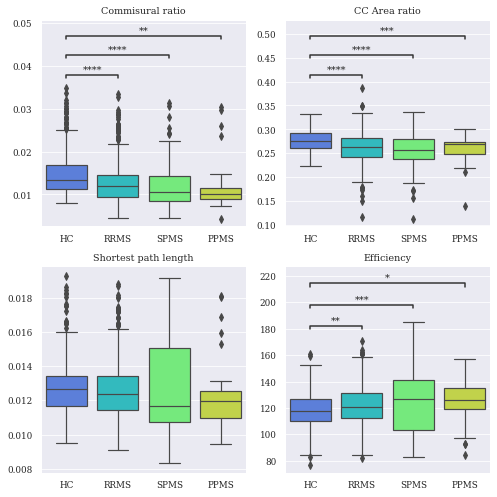

In [16]:
##Figure that separates the different groups and shows the differences across boxplots
# for specific biomarkers

## left G, right cs
statest = "t-test_ind" # Mann-Whitney t-test_ind
f, axes = plt.subplots(2, 2, figsize=(7,7))
axes = axes.ravel()
group_pairs = [("HC", "RRMS"), ("HC", "SPMS"), ("HC", "PPMS")]
# group_pairs = [("HC", "PPMS"),("RRMS", "PPMS")]

variables = ["Comm_ratio", "CC_ratio_area", "SC_spl_full", "SC_eff_full"]

sns.boxplot(data=df_merged, x="GROUP", y=variables[0], order=map_hue_color["GROUP"], orient="v", ax=axes[0])
annotator = Annotator(axes[0], group_pairs, orient='v', data=df_merged, x="GROUP", y=variables[0], order=map_hue_color["GROUP"], verbose=1)
annotator.configure(test=statest, text_format='star', loc='inside')
annotator.apply_and_annotate()
axes[0].legend([],[], frameon=False)
axes[0].set_title("Commisural ratio")
axes[0].set(xlabel=None, ylabel=None)

sns.boxplot(data=df_merged, x="GROUP", y=variables[1], order=map_hue_color["GROUP"], orient="v", ax=axes[1])
annotator = Annotator(axes[1], group_pairs, orient='v', data=df_merged, x="GROUP", y=variables[1], order=map_hue_color["GROUP"], verbose=1)
annotator.configure(test=statest, text_format='star', loc='inside')
annotator.apply_and_annotate()
axes[1].legend([],[], frameon=False)
axes[1].set_title("CC Area ratio")
axes[1].set(xlabel=None, ylabel=None)

sns.boxplot(data=df_merged, x="GROUP", y=variables[2], order=map_hue_color["GROUP"], orient="v", ax=axes[2])
#annotator = Annotator(axes[2], group_pairs, orient='v', data=df_merged, x="GROUP", y=variables[2], order=map_hue_color["GROUP"], verbose=1)
#annotator.configure(test=statest, text_format='star', loc='inside')
#annotator.apply_and_annotate()
axes[2].legend([],[], frameon=False)
axes[2].set_title("Shortest path length")
axes[2].set(xlabel=None, ylabel=None)

sns.boxplot(data=df_merged, x="GROUP", y=variables[3], order=map_hue_color["GROUP"], orient="v", ax=axes[3])
annotator = Annotator(axes[3], group_pairs, orient='v', data=df_merged, x="GROUP", y=variables[3], order=map_hue_color["GROUP"], verbose=1)
annotator.configure(test=statest, text_format='star', loc='inside')
annotator.apply_and_annotate()
axes[3].legend([],[], frameon=False)
axes[3].set_title("Efficiency")
axes[3].set(xlabel=None, ylabel=None)

plt.tight_layout()

# plt.savefig("/home/extop/GERARD/PAPERS/PAPER_TVB/FIGURES/Figure_MS_boxplot.png", dpi=300)
# plt.savefig("/home/extop/GERARD/PAPERS/PAPER_TVB/FIGURES/Figure_MS_boxplot.png", dpi=300)
